In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [5]:
sleep = pd.read_csv('sleep.csv')

In [6]:
sleep

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
sleep.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [12]:
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [11]:
sleep.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

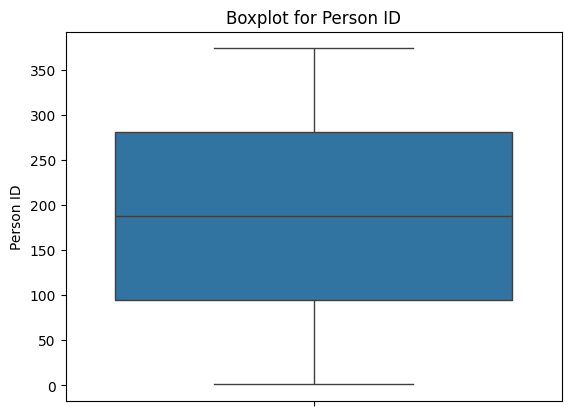

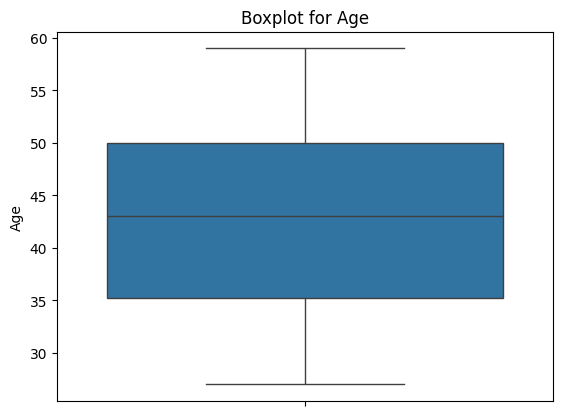

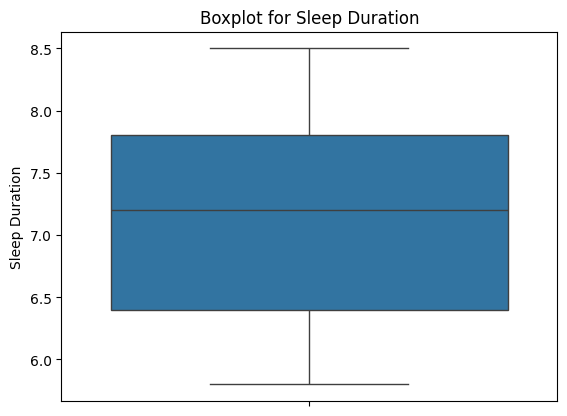

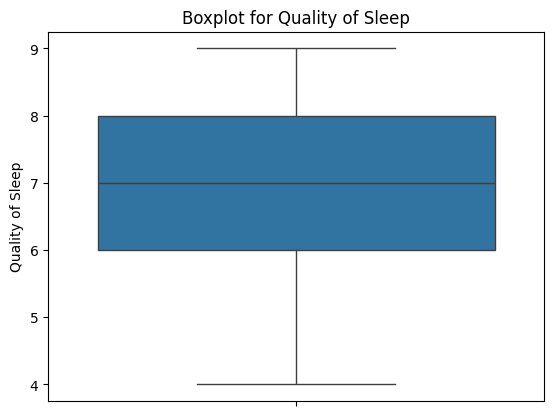

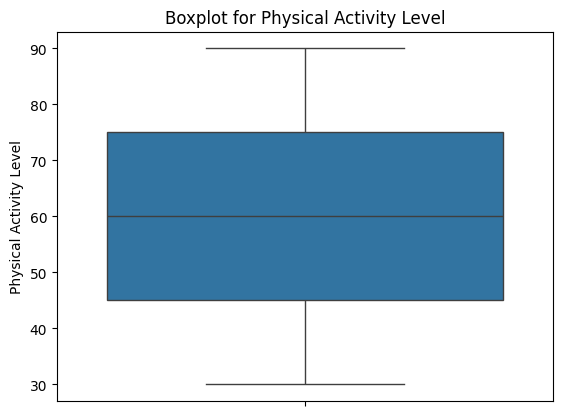

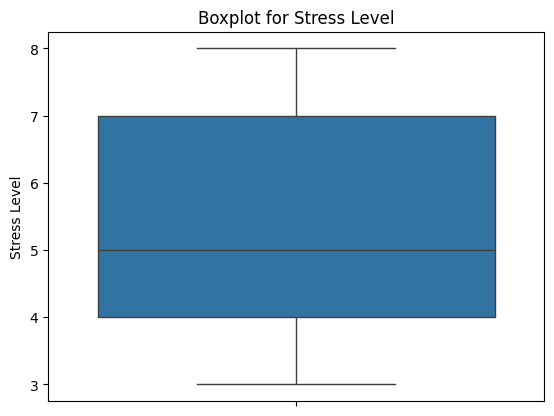

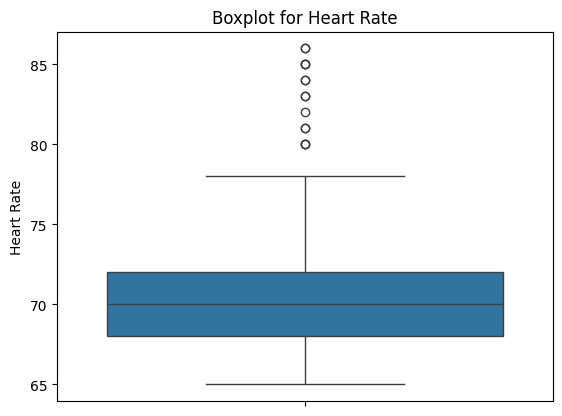

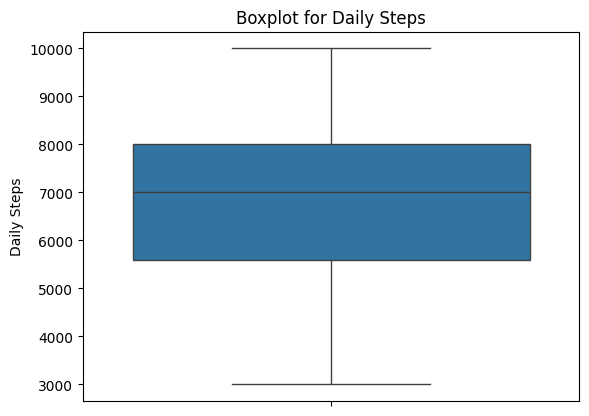

Outlier detection complete. Outlier data:
     Person ID  Gender  Age            Occupation  Sleep Duration  \
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
5            6    Male   28     Software Engineer             5.9   
6            7    Male   29               Teacher             6.3   
16          17  Female   29                 Nurse             6.5   
18          19  Female   29                 Nurse             6.5   
80          81  Female   34             Scientist             5.8   
81          82  Female   34             Scientist             5.8   
93          94    Male   35                Lawyer             7.4   
145        146  Female   38                Lawyer             7.4   
147        148    Male   39              Engineer             6.5   
264        265    Male   48                Doctor             7.3   
266        267    Male   48                Doctor            

In [21]:
numerical_cols = sleep.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for all numerical columns
for col in numerical_cols:
    sns.boxplot(sleep[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Detecting outliers using IQR
Q1 = sleep[numerical_cols].quantile(0.25)
Q3 = sleep[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((sleep[numerical_cols] < (Q1 - 1.5 * IQR)) | 
            (sleep[numerical_cols] > (Q3 + 1.5 * IQR)))

print("Outlier detection complete. Outlier data:")
print(sleep[outliers.any(axis=1)])

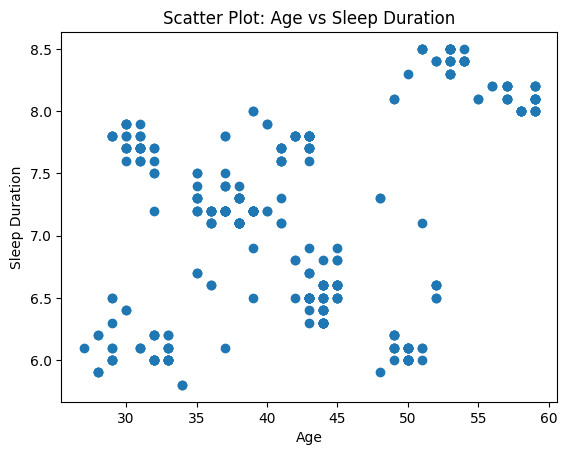

In [22]:
plt.scatter(sleep['Age'], sleep['Sleep Duration'])
plt.title('Scatter Plot: Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()


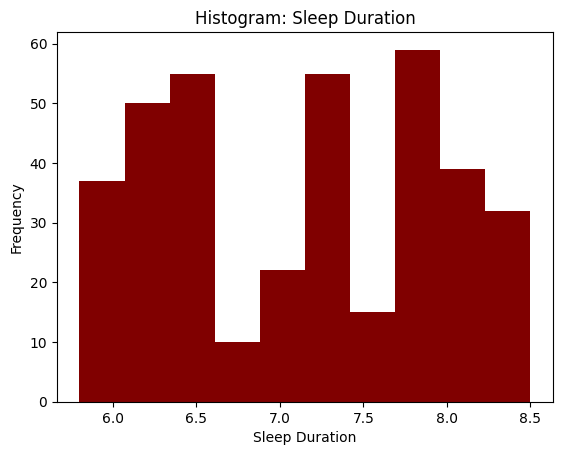

In [46]:
plt.hist(sleep['Sleep Duration'], bins=10, color='maroon')
plt.title('Histogram: Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()


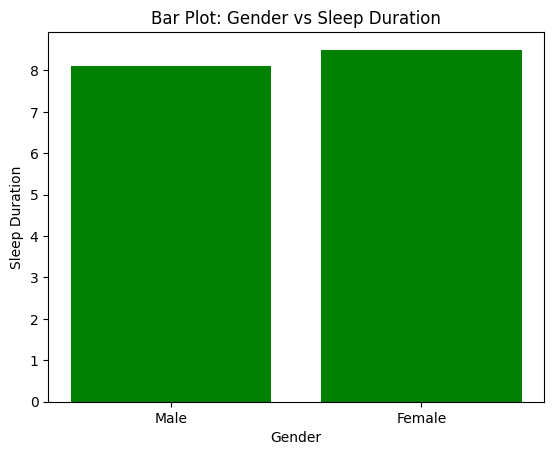

In [24]:
plt.bar(sleep['Gender'], sleep['Sleep Duration'], color='green')
plt.title('Bar Plot: Gender vs Sleep Duration')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()

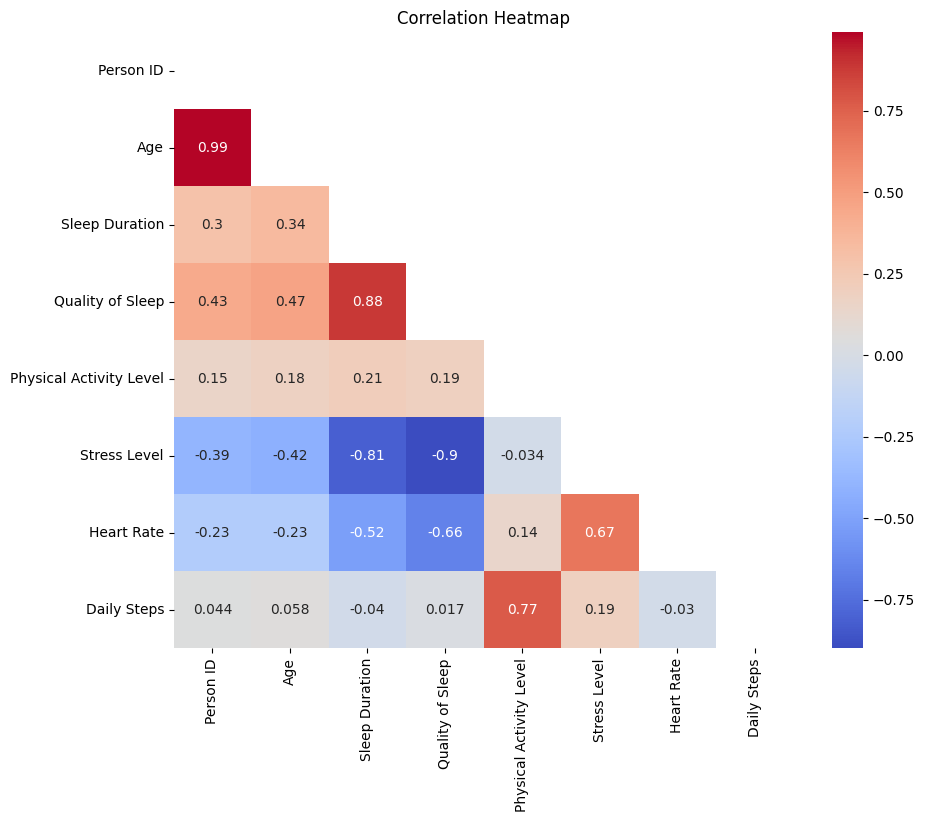

In [37]:
# Selecting only numerical columns
numerical_data = sleep.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Heatmap')
plt.show()


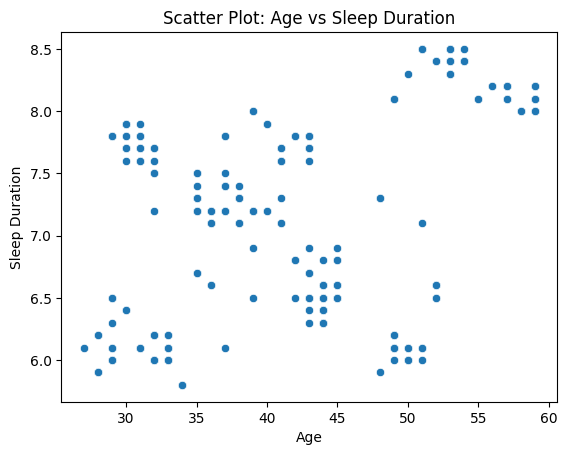

In [26]:
sns.scatterplot(x='Age', y='Sleep Duration', data=sleep)
plt.title('Scatter Plot: Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()


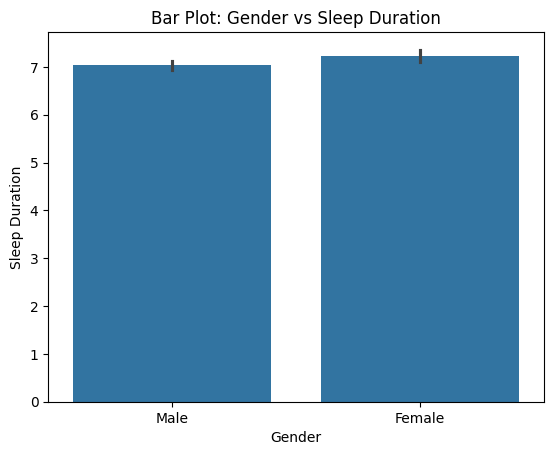

In [27]:
sns.barplot(x='Gender', y='Sleep Duration', data=sleep)
plt.title('Bar Plot: Gender vs Sleep Duration')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()


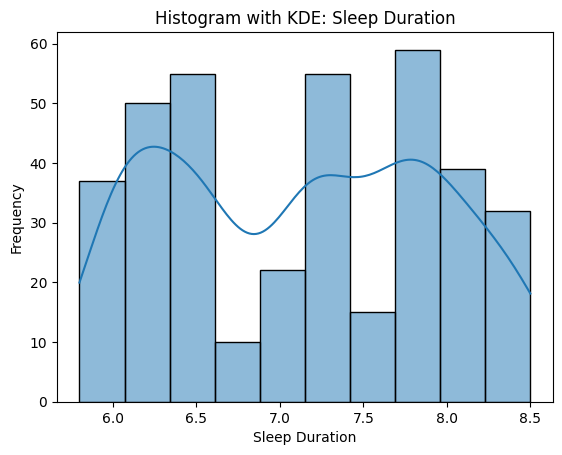

In [28]:
sns.histplot(sleep['Sleep Duration'], kde=True)
plt.title('Histogram with KDE: Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()


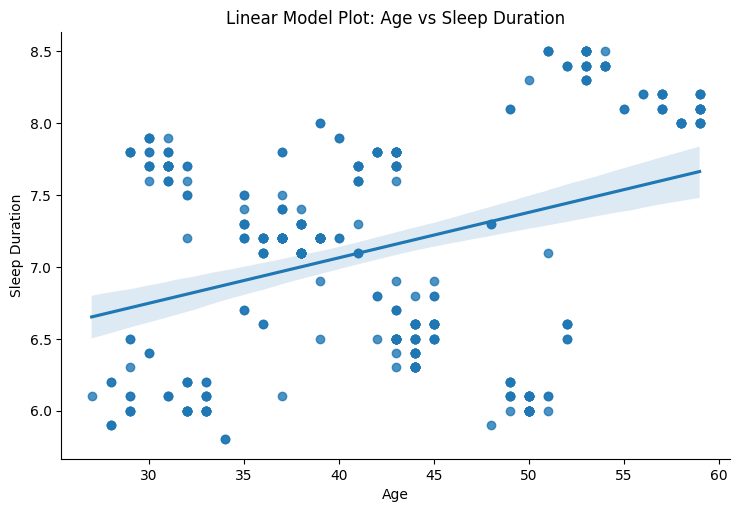

In [29]:
sns.lmplot(x='Age', y='Sleep Duration', data=sleep, aspect=1.5)
plt.title('Linear Model Plot: Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.show()


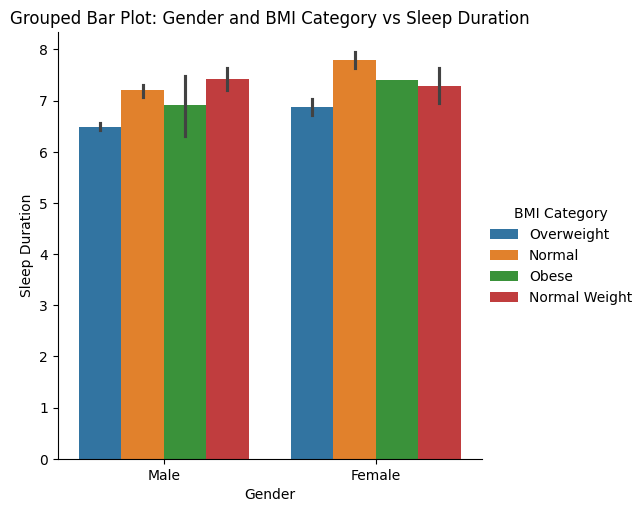

In [30]:
sns.catplot(x='Gender', y='Sleep Duration', hue='BMI Category', kind='bar', data=sleep)
plt.title('Grouped Bar Plot: Gender and BMI Category vs Sleep Duration')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()


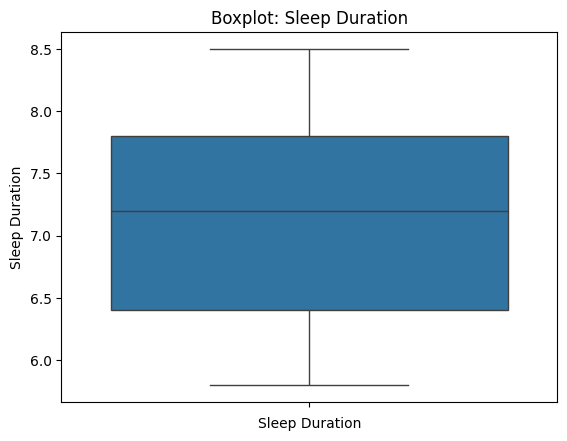

In [31]:
sns.boxplot(data=sleep['Sleep Duration'])
plt.title('Boxplot: Sleep Duration')
plt.xlabel('Sleep Duration')
plt.show()


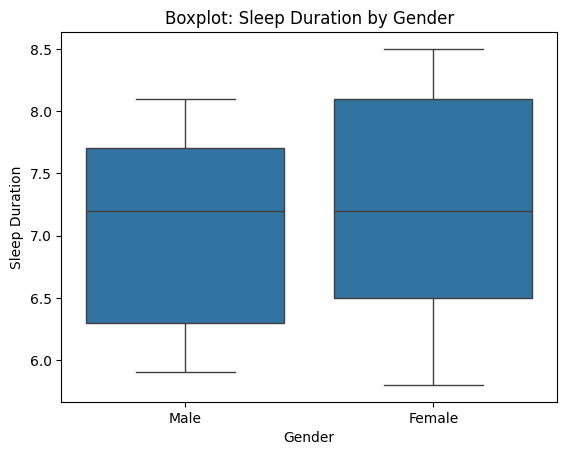

In [32]:
sns.boxplot(x='Gender', y='Sleep Duration', data=sleep)
plt.title('Boxplot: Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration')
plt.show()


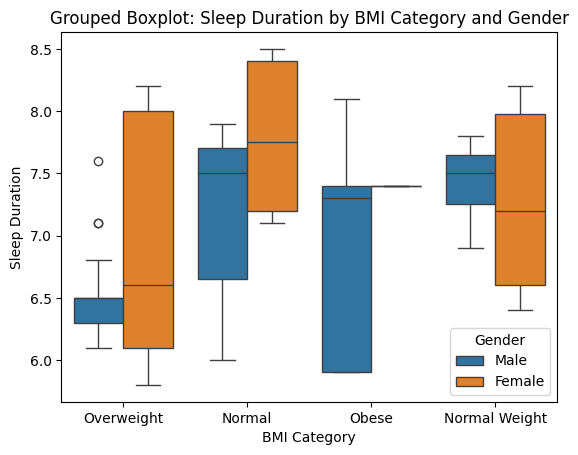

In [33]:
sns.boxplot(x='BMI Category', y='Sleep Duration', hue='Gender', data=sleep)
plt.title('Grouped Boxplot: Sleep Duration by BMI Category and Gender')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')
plt.show()


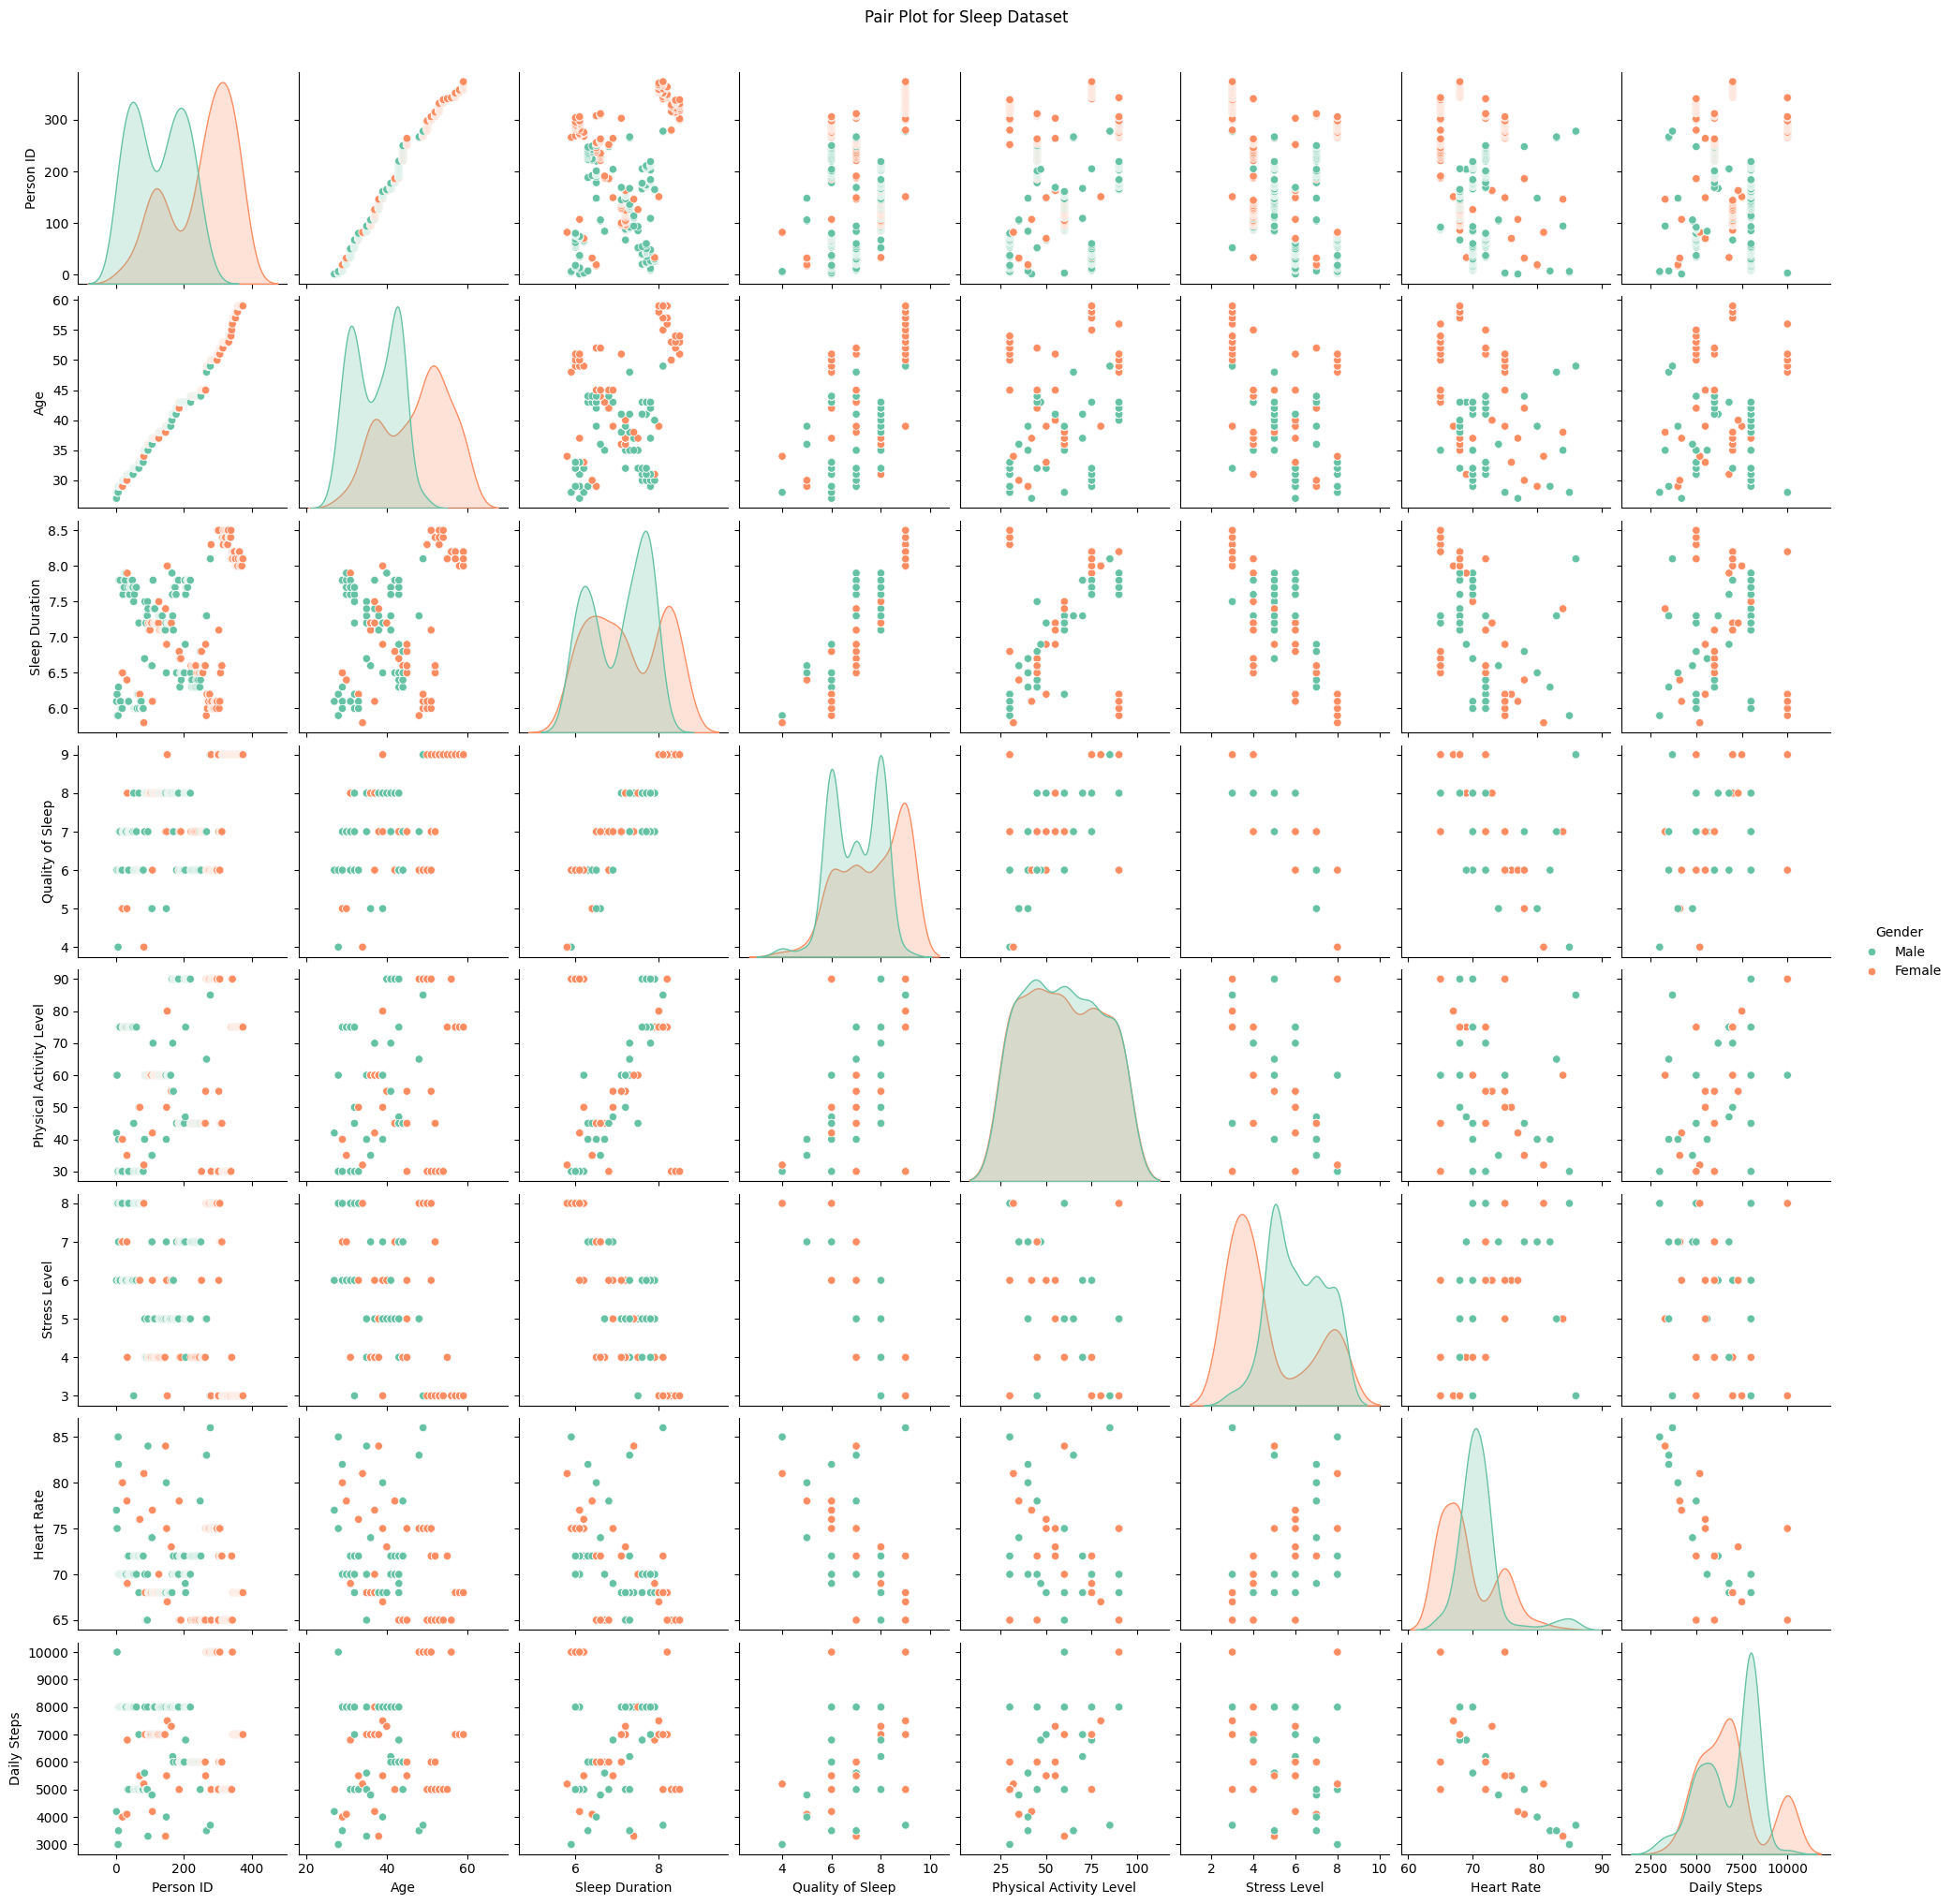

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for the sleep dataset with hue based on 'Gender'
sns.pairplot(sleep, hue='Gender', diag_kind='kde', palette='Set2')
# Add a title to the figure
plt.gcf().suptitle('Pair Plot for Sleep Dataset', y=1.02)  # Adjust y to avoid overlap
plt.show()